---

## Missing Data

Almost every dataset we will encounter in the real world has some missing or corrupt data for a variety of reasons. Therefore, it's a crucial skill of every data scientist to know a few strategies and techniques to deal detect and deal with missing data.

Let's ask ourselves the following questions:
- Can we quickly detect missing data with some library (e.g., pandas), or are there some missing or corrupt values that are not so easy to detect?
- How do we meaningfully replace the missing data?
- Why is the data missing or corrupt? Are the values MCAR, MAR, or MNAR (Missing completely at random, missing at random, missing not at random)?

We're going to use the pandas library to load a very small example dataset to illustrate the usual work-flow. The dataset contains the following information:
* ST_NUM: Street number (int)
* ST_NAME: Street name (str)
* OWN_OCCUPIED: Whether the property is occupied (str)
* NUM_BEDROOMS: Number of bedrooms (float or int)

First, we load the data (and intentionally disable the automatic missing data detection), drop some columns, and take a look at the table. In the table you can clearly identify that some entries are missing or corrupt. However, there is no standardized way that missing data is indicated. For example, you can find "NaN", "na", "n/a" or "--". Some of these are quickly dealt with if we just let pandas automatically detect the missing data, which is enabled by default.

Let's see which entries pandas would have seen as not valid.

In [5]:
df[~df.isnull()].head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104,PUTNAM,Y,3
1,197,LEXINGTON,N,3
2,,LEXINGTON,N,n/a
3,201,BERKELEY,12,1
4,203,BERKELEY,Y,3


Pandas managed to automatically detect "NaN", "NA" or "n/a" as missing values. However, it did not detect "na" or "--". A simple way to deal with this is to explicitly tell pandas which values it recognizes as missing.

In [16]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# load
data_path ='data/property_data.csv' # Use the correct path to the data
df = pd.read_csv(data_path, keep_default_na=False)
df.drop(['PID', 'NUM_BATH', 'SQ_FT'], axis=1, inplace=True)
df.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104,PUTNAM,Y,3
1,197,LEXINGTON,N,3
2,,LEXINGTON,N,n/a
3,201,BERKELEY,12,1
4,203,BERKELEY,Y,3


In [6]:
missing_vals = ['na', '--']
df = pd.read_csv(data_path, na_values=missing_vals)
df.drop(['PID', 'NUM_BATH', 'SQ_FT'], axis=1, inplace=True)
df[~df.isnull()].head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104.0,PUTNAM,Y,3.0
1,197.0,LEXINGTON,N,3.0
2,NaN,LEXINGTON,N,NaN
3,201.0,BERKELEY,12,1.0
4,203.0,BERKELEY,Y,3.0


Let's take another look at the table: are there still some corrupt entries? The answer is yes! If we look at the OWN_OCCUPIED column, we'll see that there's an integer in there, while the entries should be strings. we can, for example, deal with this by looping through the rows of that column and checking if the entry is truly a string, or whether it can be turned into an integer. If it's a number, we just turn it into NaN.

In [7]:
for i, row in enumerate(df['OWN_OCCUPIED']):
    try:
        int(row)
        df.loc[i, 'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass

df.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104.0,PUTNAM,Y,3.0
1,197.0,LEXINGTON,N,3.0
2,NaN,LEXINGTON,N,NaN
3,201.0,BERKELEY,NaN,1.0
4,203.0,BERKELEY,Y,3.0


It can also be useful to quickly get some summary about missing  values. Here are some example commands.

In [8]:
# total missing values for each column
df.isnull().sum()

ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
dtype: int64

In [9]:
# are there any missing values?
np.any(df.isnull())

True

In [10]:
# total count of missing values
np.sum(df.isnull().sum())

8

Now that we can detect missing data, the next question is how to deal with it. For now, here are some very basic treatments that we can apply if our dataset is not very pathological. we can, for example, drop all rows or columns with missing data. Note, however, that this may leave we with a very small dataset.

In [11]:
df.dropna(axis=0)

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104.0,PUTNAM,Y,3.0
1,197.0,LEXINGTON,N,3.0
4,203.0,BERKELEY,Y,3.0


If we just want to replace one value, we can do this manually:

In [12]:
df.loc[2, 'ST_NUM'] = 125

we can also replace all missing values in a column with a number. A common (but not very good) method is to replace NaN values with the median of that feature.

In [13]:
# replace all missing values in a column with a number
df['ST_NUM'].fillna(125, inplace=True)

# replace all missing values in a column with the median
df['NUM_BEDROOMS'].fillna(df['NUM_BEDROOMS'].median(), inplace=True)

df.head()

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS
0,104.0,PUTNAM,Y,3.0
1,197.0,LEXINGTON,N,3.0
2,125.0,LEXINGTON,N,3.0
3,201.0,BERKELEY,NaN,1.0
4,203.0,BERKELEY,Y,3.0


#### Imputing

*Imputing* means using a model to replace missing values. There are various imputation strategies, for example:

* A constant value that is meaningful for the given feature.
* A value from another randomly select row (in the same column).
* A mean, median or mode value for the column.
* A value estimated by another predictive model (e.g., regression).

#### Note on diagnostics
As we've learned in the lecture, we should investigate to what category our missing data belows. Hopefully, it is MCAR, and then we are lucky, and we can use simple techniques. Sadly, python is a bit lacking when it comes to performing these diagnostics. For this task, R is much better suited.

A simple heuristic to check whether our missing data could be MCAR is to compare the means of wer data with and without the missing data. If they are very similar, it is likely that the missing values are MCAR. However, this is only a very basic test. As a conscientious data scientist, we should always perform these diagnostics thoroughly. For further reading, we may start [here](https://www.jstor.org/stable/2290157?seq=1#metadata_info_tab_contents).

- First we, load the data in the file '*Ex8.3_data.csv*'. How many entries in the 'y' column can we consider as missing? Replace missing values with NaNs and show a scatter plot of 'x' vs 'y', color-coded according to the 'z' column.

- Which classes (MCAR, MAR, or MNAR) of missing data can we find in this dataset? How many entries belong to each of these classes?


In [14]:
# let's count how many ys are missing, then replace y and z values, convert strings to floats

not_detected = ['not detected', '-']
data = pd.read_csv('data/Ex8.3_data.csv', na_values = not_detected)
print('Number of missing values in y-column:', data['y'].isnull().sum())
# print('Number of missing values in z-column:', data['z'].isnull().sum())

# data['y'].fillna(data['y'].mean(), inplace = True)
# data['z'].fillna(data['z'].mean(), inplace = True)

data = data.astype(float)


Number of missing values in y-column: 4537


Text(0, 0.5, 'y')

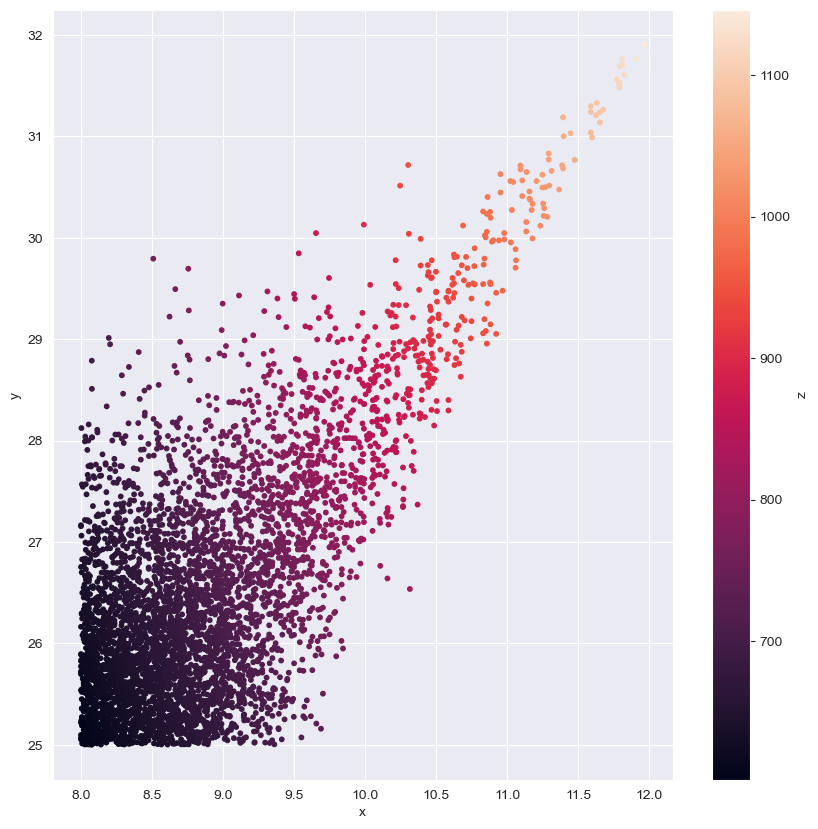

In [17]:
# TO-DO: Plot the data  # scatter x,y color = z

plt.figure(figsize = (10,10))

sct = plt.scatter(data['x'], data['y'], c = data['z'],s = 10)
cbar = plt.colorbar(sct)
cbar.set_label('z')
plt.xlabel('x')
plt.ylabel('y')

In [19]:
# let's classify the data
# which of the three classes can we find?
# how much data belongs to different classes?

MCAR = 0
MAR = 0
MNAR = 0

miss_y = []
miss_y_z = []
miss_z = []

for i in range(len(data)):
    if np.isnan(data.loc[i,'y']) and np.isnan(data.loc[i, 'z']):
        miss_y_z.append(data.loc[i, 'x'])
    elif np.isnan(data.loc[i, 'z']):
        miss_z.append([data.loc[i,'x'], data.loc[i, 'y']])
    elif np.isnan(data.loc[i,'y']) and notnp.isnan(data.loc[i, 'z']):
        miss_y.append(data.loc[i, 'x'])

miss_z = np.array(miss_z)

In [20]:
print('misses y and z:',len(miss_y_z), '\nmisses only z:  ',len(miss_z), '\nmisses only y:    ',len(miss_y))

misses y and z: 4537 
misses only z:   518 
misses only y:     0


Text(0.5, 1.0, 'distribution of missing z')

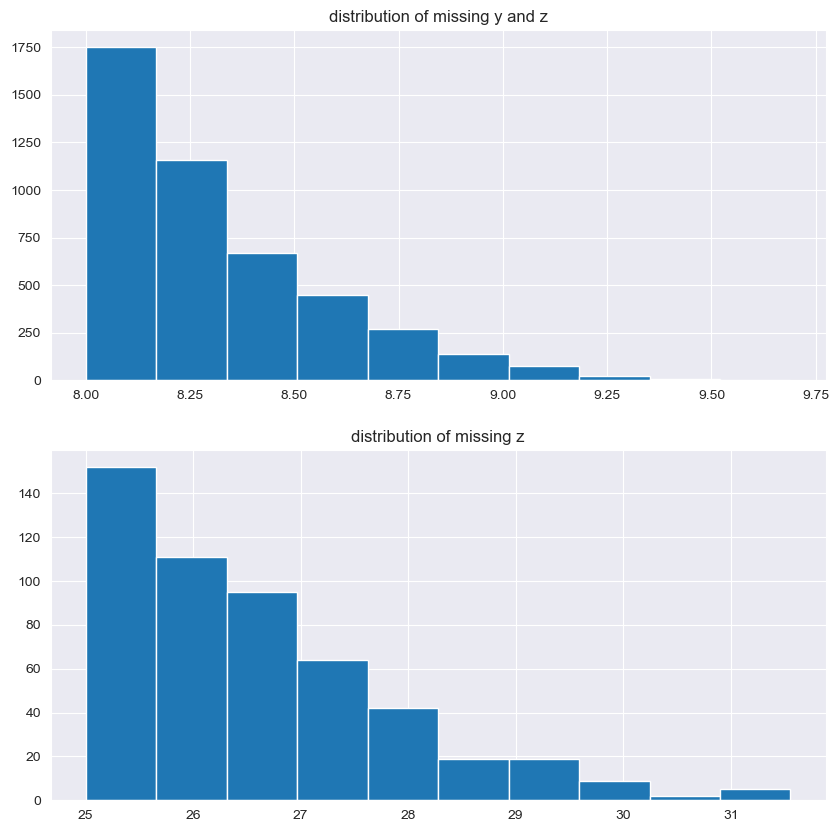

In [21]:
fig, axs = plt.subplots(2, figsize = (10,10))

axs[0].hist(miss_y_z)
axs[0].set_title('distribution of missing y and z')
axs[1].hist(miss_z[:,1])
axs[1].set_title('distribution of missing z')

In [22]:
# now classify according to: MCAR: prob that data misses for variable stays the same

dict_y_z = {}

for key in miss_y_z:
    if key not in dict_y_z.keys():
        dict_y_z[key] = 1
    elif key in dict_y_z.keys():
        dict_y_z[key] += 1

dict_z = {}

for i, keyy in enumerate(miss_z[:,0]):
    if keyy not in dict_z.keys():
        dict_z[keyy] = [1, miss_z[i,1]]
    elif keyy in dict_z.keys():
        dict_z[keyy][0] += 1

dict_x = {}

for key_ in data.loc[:, 'x']:
    if key_ not in dict_x.keys():
        dict_x[key_] = 1
    elif key_ in dict_x.keys():
        dict_x[key_] += 1



In [23]:
prob_yz = []
prob_z = []

for key in dict_y_z.keys():
    prob_yz.append([key, dict_y_z[key]/dict_x[key]])
for key in dict_z.keys():
    prob_z.append([key, dict_z[key][0]/dict_x[key], dict_z[key][1]])


prob_z.sort()
prob_yz.sort()

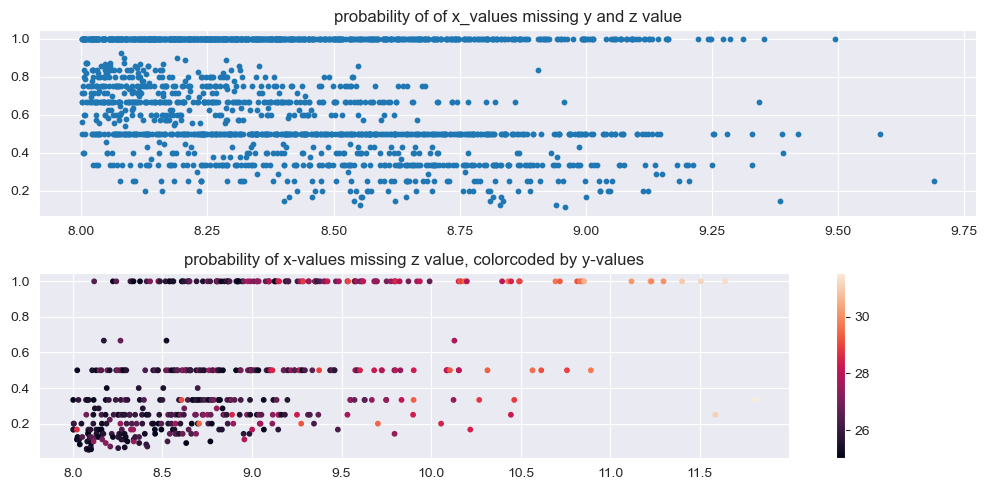

In [34]:

prob_yz = np.array(prob_yz)
prob_z = np.array(prob_z)

fig, axs = plt.subplots(2,figsize = (10,5))

axs[0].scatter(prob_yz[:,0], prob_yz[:,1], marker = 'o',s = 10)
axs[0].set_title('probability of of x_values missing y and z value')
sct = axs[1].scatter(prob_z[:,0], prob_z[:,1], c = prob_z[:,2], marker = 'o', s = 10 )
axs[1].set_title('probability of x-values missing z value, colorcoded by y-values')
plt.colorbar(sct)

plt.tight_layout()


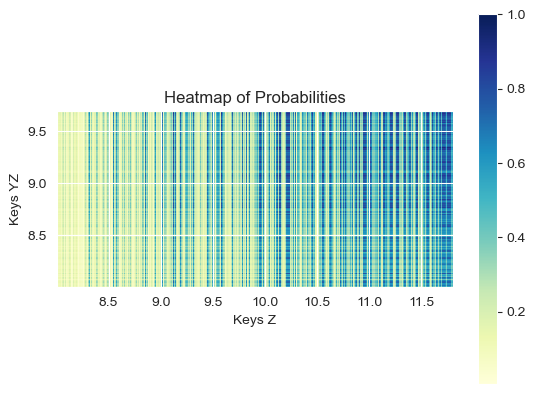

In [36]:
# Assuming that prob_yz and prob_z are already defined

# Extract unique keys from prob_yz and prob_z
keys_yz = np.unique(prob_yz[:, 0])
keys_z = np.unique(prob_z[:, 0])

# Create a grid of zeros with the shape of (len(keys_yz), len(keys_z))
heatmap_data = np.zeros((len(keys_yz), len(keys_z)))

# Fill in the heatmap data from prob_yz and prob_z
for i, key_yz in enumerate(keys_yz):
    for j, key_z in enumerate(keys_z):
        if key_yz in prob_yz[:, 0] and key_z in prob_z[:, 0]:
            yz_index = np.where(prob_yz[:, 0] == key_yz)[0][0]
            z_index = np.where(prob_z[:, 0] == key_z)[0][0]
            heatmap_data[i, j] = prob_yz[yz_index, 1] * prob_z[z_index, 1]

# Create the imshow plot
plt.imshow(heatmap_data, cmap='YlGnBu', extent=[min(keys_z), max(keys_z), min(keys_yz), max(keys_yz)])
plt.colorbar()
plt.title("Heatmap of Probabilities")
plt.xlabel("Keys Z")
plt.ylabel("Keys YZ")
plt.show()


### Sum Up

As seen above the observations which didn't detect y and z show no relationship between a not detected values and the independent variable x. The probability of missing values is random for x-values. Therefore I would classify my list miss_y_z as MCAR, which means that there are 4537 MCAR values.

The values that only miss the z-value seem to depend in x because the greater x becomes the more rises the chance of z missing.
However z doesn't seem to depend on y because the color coded points are relatively randomly distributed. I would classify my list miss_z as MAR (=518).
In my opinion, there are no MNAR entries.

In [ ]:
# also a scatte plot of values missing only z as eg red, and values also missing y taking the value of 0
# no mcar, mnar are missing y_z (because they miss at a certain value more often) and mnar are missing_z (value of z depends on x and y)because they depend on a certain value thats why they are mar
# key is that probabilty of missing z depends also on x and y as seen in my scatter (fuck didn't I see this????)
# tip: do shine through histograms with setting alpha < 1, plotting more than one hist in one plot